# Data Collection and Download

## Enviroment Set-Up

In [ ]:
!pip install kaggle
!pip install kaggle dask[complete] dask[bag] dask[dataframe] dask[array] --quiet

In [1]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Download

In [1]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-dataset

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset
License(s): MIT
100% 23.1G/23.1G [15:28<00:00, 33.1MB/s]
100% 23.1G/23.1G [15:28<00:00, 26.7MB/s]


In [2]:
!unzip fashion-product-images-dataset.zip -d /content/fashion-product-images

Streaming output truncated to the last 5000 lines.
  inflating: /content/fashion-product-images/fashion-dataset/styles/58128.json  
  inflating: /content/fashion-product-images/fashion-dataset/styles/58129.json  
  inflating: /content/fashion-product-images/fashion-dataset/styles/5813.json  
  inflating: /content/fashion-product-images/fashion-dataset/styles/58131.json  
  inflating: /content/fashion-product-images/fashion-dataset/styles/58132.json  
  inflating: /content/fashion-product-images/fashion-dataset/styles/58133.json  
  inflating: /content/fashion-product-images/fashion-dataset/styles/58135.json  
  inflating: /content/fashion-product-images/fashion-dataset/styles/58136.json  
  inflating: /content/fashion-product-images/fashion-dataset/styles/58137.json  
  inflating: /content/fashion-product-images/fashion-dataset/styles/58138.json  
  inflating: /content/fashion-product-images/fashion-dataset/styles/58139.json  
  inflating: /content/fashion-product-images/fashion-datase

In [3]:
!ls /content/

fashion-product-images	fashion-product-images-dataset.zip  sample_data


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Copy the downloaded file to Google Drive
#!cp fashion-product-images-dataset.zip /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
^C


In [6]:
import numpy as np
import pandas as pd
#import dask.dataframe as dd
import json
import matplotlib.pyplot as plt
import os

In [7]:
# File Paths
styles_csv_file_path = '/content/fashion-product-images/fashion-dataset/styles.csv'
images_csv_file_path = '/content/fashion-product-images/fashion-dataset/images.csv'
images_file_path = '/content/fashion-product-images/fashion-dataset/images'
metadata_file_path = '/content/fashion-product-images/fashion-dataset/styles'

In [8]:
def get_folder_size(images_file_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(images_file_path):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            total_size += os.path.getsize(filepath)
    return total_size

# Get folder size
folder_size = get_folder_size(images_file_path)

# Convert size to gigabytes (GB)
folder_size_gb = folder_size / (1024 ** 3)

print(f"Folder size: {folder_size_gb:.2f} GB")

Folder size: 13.90 GB


In [9]:
def get_folder_size(metadata_file_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(metadata_file_path):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            total_size += os.path.getsize(filepath)
    return total_size

# Get folder size
folder_size = get_folder_size(metadata_file_path)

# Convert size to gigabytes (GB)
folder_size_gb = folder_size / (1024 ** 3)

print(f"Folder size: {folder_size_gb:.2f} GB")

Folder size: 0.73 GB


In [10]:
# Get file size
file_size = os.path.getsize(styles_csv_file_path)

# Convert size to megabytes (MB)
file_size_mb = file_size / (1024 * 1024)

print(f"File size: {file_size_mb:.2f} MB")

File size: 4.13 MB


In [11]:
# Get file size
file_size = os.path.getsize(images_csv_file_path)

# Convert size to megabytes (MB)
file_size_mb = file_size / (1024 * 1024)

print(f"File size: {file_size_mb:.2f} MB")

File size: 4.99 MB


# CSV Handling

In [12]:
styles = pd.read_csv(styles_csv_file_path, on_bad_lines='skip')
print(f"Total Rows: {styles.shape[0]}\nTotal Columns: {styles.shape[1]}")

Total Rows: 44424
Total Columns: 10


In [13]:
images = pd.read_csv(images_csv_file_path, on_bad_lines='skip')
print(f"Total Rows: {images.shape[0]}\nTotal Columns: {images.shape[1]}")

Total Rows: 44446
Total Columns: 2


In [14]:
styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [15]:
images.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [16]:
styles.isnull().sum()

,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,15
season,21
year,1
usage,317
productDisplayName,7


In [17]:
images.isnull().sum()

,0
filename,0
link,0


In [18]:
styles_clean = styles.dropna()

In [19]:
styles_clean.isnull().sum()

,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,0
year,0
usage,0
productDisplayName,0


In [20]:
styles_clean.info()
styles_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 44077 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44077 non-null  int64  
 1   gender              44077 non-null  object 
 2   masterCategory      44077 non-null  object 
 3   subCategory         44077 non-null  object 
 4   articleType         44077 non-null  object 
 5   baseColour          44077 non-null  object 
 6   season              44077 non-null  object 
 7   year                44077 non-null  float64
 8   usage               44077 non-null  object 
 9   productDisplayName  44077 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.7+ MB


,id,year
count,44077.000000,44077.000000
mean,29550.577444,2012.782041
std,16974.233378,2.108119
min,1163.000000,2007.000000
25%,14722.000000,2011.000000
50%,28491.000000,2012.000000
75%,44407.000000,2015.000000
max,60000.000000,2019.000000


In [21]:
images.info()
images.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  44446 non-null  object
 1   link      44446 non-null  object
dtypes: object(2)
memory usage: 694.6+ KB


,filename,link
count,44446,44446
unique,44446,44440
top,15970.jpg,undefined
freq,1,5


In [22]:
images['id'] = images['filename'].str[:-4]

In [23]:
images['id'] = images['id'].astype(int)

In [24]:
images.head()

,filename,link,id
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,15970
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,39386
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,59263
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,21379
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,53759


In [25]:
#merged_df = styles_clean.merge(images_clean, on='id', how='left')
merged_df = styles_clean.merge(images[['id', 'link']], on='id', how='left')

In [26]:
merged_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,link
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,http://assets.myntassets.com/v1/images/style/p...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,http://assets.myntassets.com/v1/images/style/p...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,http://assets.myntassets.com/v1/images/style/p...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,http://assets.myntassets.com/v1/images/style/p...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,http://assets.myntassets.com/v1/images/style/p...


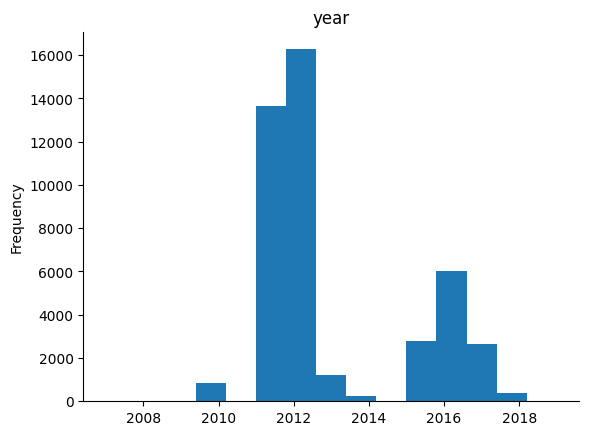

In [27]:
from matplotlib import pyplot as plt
merged_df['year'].plot(kind='hist', bins=15, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

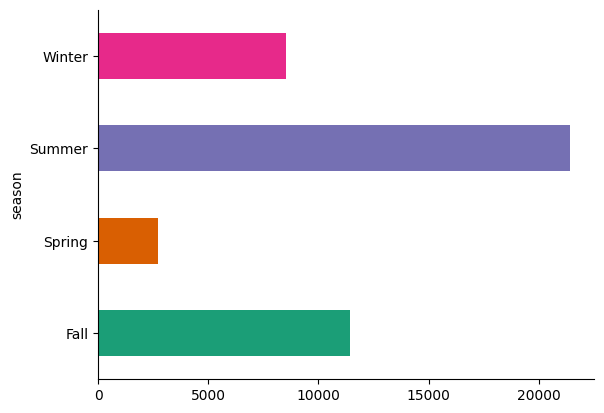

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

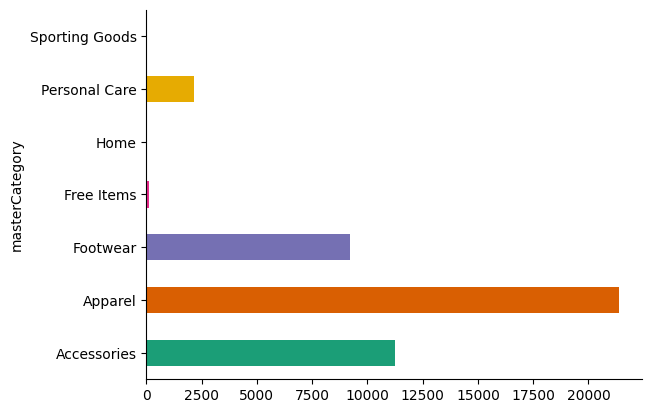

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('masterCategory').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

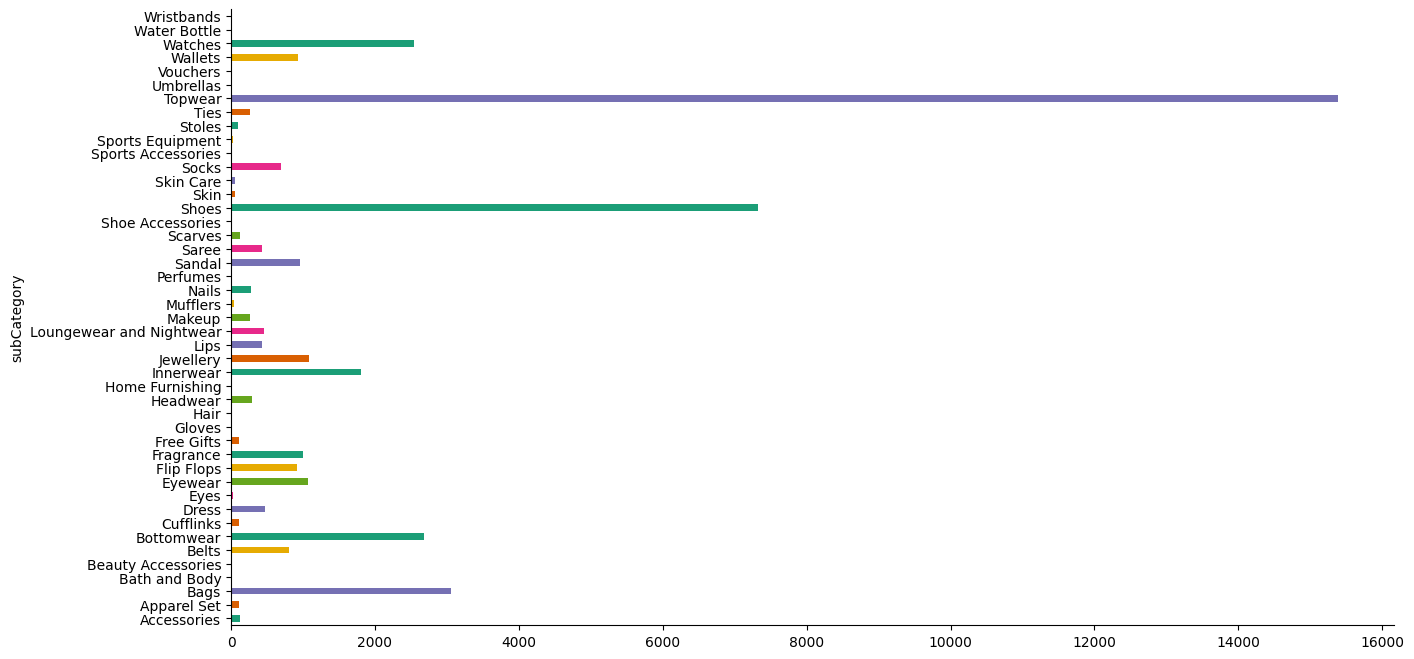

In [30]:
plt.figure(figsize=(15, 8))

# Plot the grouped data
merged_df.groupby('subCategory').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Remove the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()


# Image Handing

In [31]:
image_files = os.listdir(images_file_path)
print(image_files[:10])  # print sample of images filenames = ID

['41144.jpg', '4402.jpg', '46802.jpg', '36484.jpg', '52444.jpg', '26783.jpg', '39174.jpg', '39892.jpg', '42614.jpg', '41944.jpg']


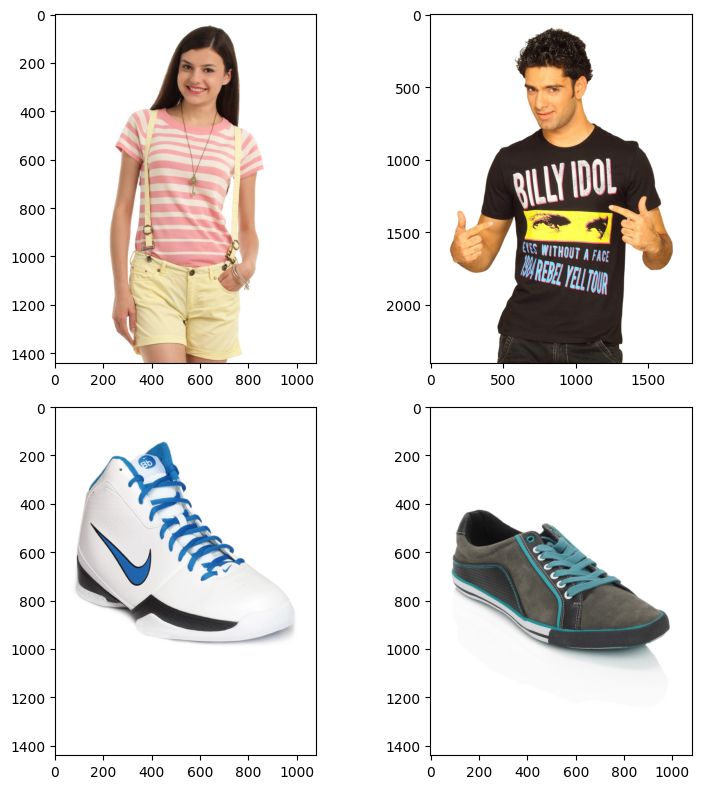

In [32]:
from PIL import Image

image_files_dir = [images_file_path + '/' + img for img in image_files[:4]]
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, ax in enumerate(axes.flatten()):
  img = Image.open(image_files_dir[i])
  ax.imshow(img)
  #ax.axis('off')

plt.tight_layout()
plt.show()


In [33]:
# get image pixel information

for img_file in image_files[:10]:
    img_path = os.path.join(images_file_path, img_file)
    with Image.open(img_path) as img:
        #print(f'{img_file}: {img.size}, {img.format}')
        img_array = np.array(img)

        # Print image details
        print(f'{img_file}: Size={img.size}, Format={img.format}, Array shape={img_array.shape}')


41144.jpg: Size=(1080, 1440), Format=JPEG, Array shape=(1440, 1080, 3)
4402.jpg: Size=(1800, 2400), Format=JPEG, Array shape=(2400, 1800, 3)
46802.jpg: Size=(1080, 1440), Format=JPEG, Array shape=(1440, 1080, 3)
36484.jpg: Size=(1080, 1440), Format=JPEG, Array shape=(1440, 1080, 3)
52444.jpg: Size=(1080, 1440), Format=JPEG, Array shape=(1440, 1080, 3)
26783.jpg: Size=(1080, 1440), Format=JPEG, Array shape=(1440, 1080, 3)
39174.jpg: Size=(1800, 2400), Format=JPEG, Array shape=(2400, 1800, 3)
39892.jpg: Size=(1080, 1440), Format=JPEG, Array shape=(1440, 1080, 3)
42614.jpg: Size=(1080, 1440), Format=JPEG, Array shape=(1440, 1080, 3)
41944.jpg: Size=(1080, 1440), Format=JPEG, Array shape=(1440, 1080, 3)


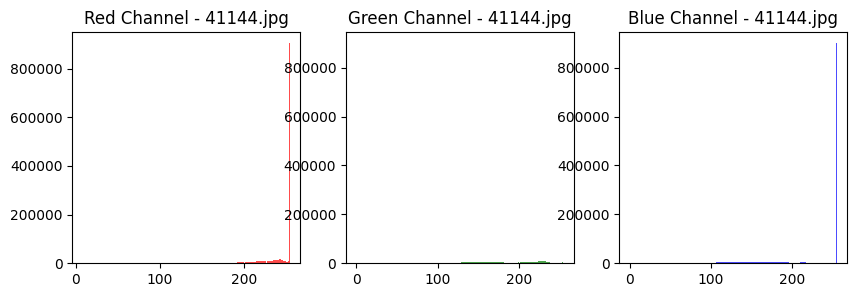

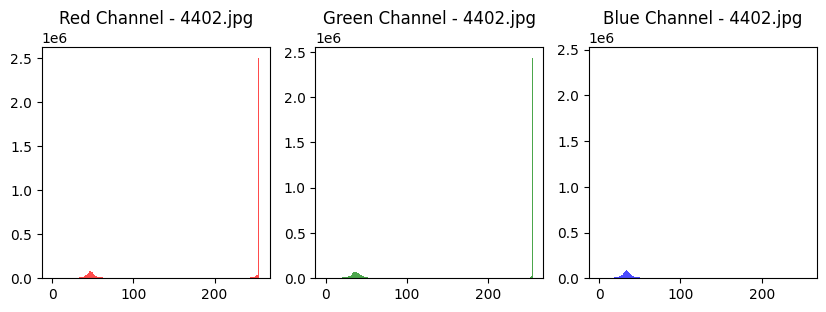

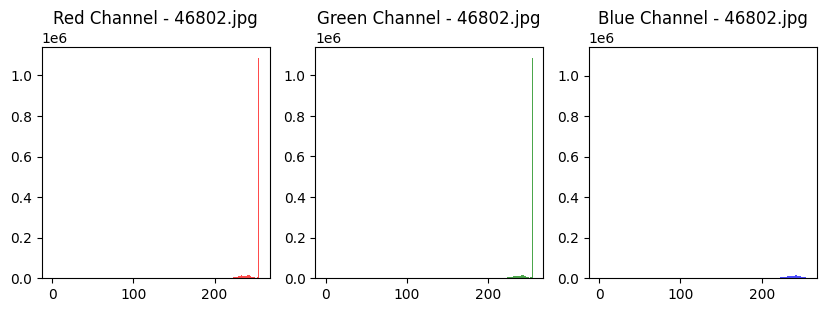

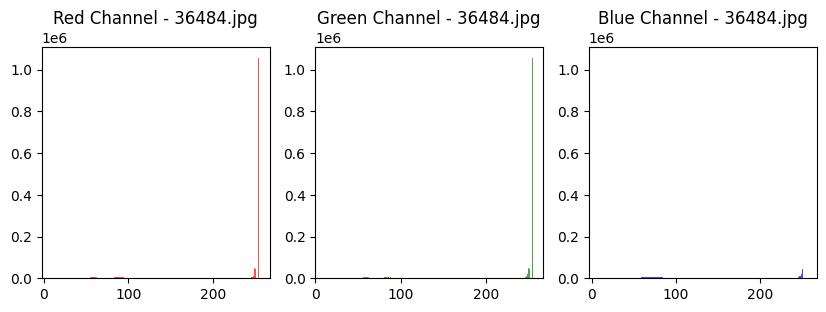

In [34]:
# Extract dominant colours

for img_file in image_files[:4]:
    img_path = os.path.join(images_file_path, img_file)
    with Image.open(img_path) as img:
        img_array = np.array(img)

        # Separate the channels
        red_channel = img_array[:, :, 0].flatten()
        green_channel = img_array[:, :, 1].flatten()
        blue_channel = img_array[:, :, 2].flatten()

        # Plot the histogram for each channel
        plt.figure(figsize=(10, 3))
        plt.subplot(131)
        plt.hist(red_channel, bins=256, color='red', alpha=0.7)
        plt.title(f'Red Channel - {img_file}')

        plt.subplot(132)
        plt.hist(green_channel, bins=256, color='green', alpha=0.7)
        plt.title(f'Green Channel - {img_file}')

        plt.subplot(133)
        plt.hist(blue_channel, bins=256, color='blue', alpha=0.7)
        plt.title(f'Blue Channel - {img_file}')

        plt.show()

# can use clustering to find actual dominant coloyurs in each image

# JSON File

In [35]:
# List all JSON files in the directory
json_files = [f for f in os.listdir(metadata_file_path) if f.endswith('.json')]

# Print the first 10 JSON filenames
print(json_files[:10])

['18421.json', '59516.json', '4392.json', '36518.json', '46575.json', '33654.json', '17699.json', '19867.json', '54889.json', '6697.json']


In [36]:
# Choose a specific JSON file (e.g., the first one in the list)
if json_files:
    chosen_file = json_files[0]  # or any file you want to open
    json_file_path = os.path.join(metadata_file_path, chosen_file)

    # Open and load the chosen JSON file
    with open(json_file_path, 'r') as f:
        json_data = json.load(f)

    # Proceed with your code to work with json_data
    print(f"Loaded data from {chosen_file}:")
    print(json_data)
else:
    print("No JSON files found in the directory.")

Loaded data from 18421.json:
{'notification': {}, 'meta': {'code': 200, 'requestId': 'df2b3ffb-6257-4139-838d-e81a0dc62e36'}, 'data': {'id': 18421, 'price': 5999, 'discountedPrice': 5999, 'styleType': 'P', 'productTypeId': 288, 'articleNumber': '12371 Pink', 'visualTag': '', 'productDisplayName': 'Skechers Women Shape-Ups White Shoe', 'variantName': 'Shape-Ups', 'myntraRating': 1, 'catalogAddDate': 1456403163, 'brandName': 'Skechers', 'ageGroup': 'Adults-Women', 'gender': 'Women', 'baseColour': 'White', 'colour1': 'Black', 'colour2': 'Pink', 'fashionType': 'Fashion', 'season': 'Summer', 'year': '2012', 'usage': 'Sports', 'vat': 14.5, 'displayCategories': 'Footwear', 'weight': '0', 'navigationId': 0, 'landingPageUrl': 'Sports-Shoes/Skechers/Skechers-Women-Shape-Ups-White-Shoe/18421/buy', 'articleAttributes': {'Sport': 'Running'}, 'crossLinks': [{'key': 'More Sports Shoes by Skechers', 'value': 'sports-shoes?f=brand:Skechers::gender:women'}, {'key': 'More White Sports Shoes', 'value': 's

In [37]:
import json
import pprint

# List all files in the directory
all_files = os.listdir(metadata_file_path)

# Filter to get only JSON files
json_files = [file for file in all_files if file.endswith('.json')]

# Process the first 4 JSON files
for json_file in json_files[:1]:
    json_file_path = os.path.join(metadata_file_path, json_file)
    with open(json_file_path, 'r') as f:
        json_data = json.load(f)
    print(f"Contents of {json_file}:")
    pprint.pprint(json_data, indent=4)
    print("\n" + "-"*80 + "\n")


Contents of 18421.json:
{   'data': {   'ageGroup': 'Adults-Women',
                'articleAttributes': {'Sport': 'Running'},
                'articleDisplayAttr': {   'core': {   'display': '2',
                                                      'order': '0',
                                                      'pdtDeliveryOptions': '2',
                                                      'pdtDetail': '2',
                                                      'pdtLike': '2',
                                                      'pdtSimilar': '2'},
                                          'explore': {   'crosslink': '1',
                                                         'display': '2',
                                                         'order': '2',
                                                         'similar': '1'},
                                          'id': 95,
                                          'social': {   'crossSell': '1',
                   

In [39]:
# List all files in the directory
json_files = [f for f in os.listdir(metadata_file_path) if f.endswith('.json')]

# Initialize an empty list to store data from JSON files
data_list = []

# Loop through the JSON files
for json_file in json_files[:4]:  # Adjust number of files to process as needed
    json_file_path = os.path.join(metadata_file_path, json_file)

    with open(json_file_path, 'r') as f:
        json_data = json.load(f)

    data_list.append(json_data)

# Normalize the list of JSON data
df_json = pd.json_normalize(data_list)
print(df_json.head())


   meta.code                        meta.requestId  data.id  data.price  \
0        200  df2b3ffb-6257-4139-838d-e81a0dc62e36    18421        5999   
1        200  795d8350-b923-4122-8625-f141264631e7    59516        1750   
2        200  a2c2de09-f39d-44e5-8335-f361e027c499     4392         599   
3        200  cdc25e6f-4b84-4f7b-a50a-84bd03064b72    36518        1499   

   data.discountedPrice data.styleType  data.productTypeId data.articleNumber  \
0                  5999              P                 288         12371 Pink   
1                  1750              P                 414             PF4114   
2                   599              P                 289         FA11TS1038   
3                   524              P                 360  12P6BE7U2789I-945   

  data.visualTag                            data.productDisplayName  ...  \
0                               Skechers Women Shape-Ups White Shoe  ...   
1                                  Lucera Silver Pendant With Chai